In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal,ogr,osr
from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd
from osgeo import gdal,ogr,osr
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

In [2]:
df_spectral = pd.read_csv(r"F:\wenqu\Aviris\site1b\site1b_aviris_single_pixel_band.csv")
df_spectral

,file_name,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_416,band_417,band_418,band_419,band_420,band_421,band_422,band_423,band_424,band_425
0,10_21.tif,0.004095,0.008366,0.011143,0.012064,0.014178,0.016157,0.019465,0.019648,0.021816,...,0.032876,0.031840,0.031030,0.032435,0.039850,0.046477,0.122873,0.289441,0.113001,0.091605
1,10_24.tif,0.010162,0.017987,0.010830,0.017021,0.017567,0.016379,0.019352,0.020424,0.023193,...,0.026392,0.027079,0.032499,0.035687,0.030389,0.067178,0.088952,0.144447,0.125137,0.064748
2,10_25.tif,0.006902,0.009180,0.011334,0.013874,0.017388,0.015369,0.017985,0.020031,0.023258,...,0.036849,0.027824,0.032534,0.039909,0.032636,0.055107,0.040646,0.173911,0.154935,0.074669
3,10_26.tif,0.005427,0.008547,0.010773,0.014396,0.014228,0.014790,0.017349,0.020693,0.022823,...,0.031407,0.031854,0.035131,0.037115,0.037787,0.051414,0.072393,0.287284,0.121171,0.080450
4,10_27.tif,0.010331,0.012824,0.012874,0.013316,0.016856,0.018601,0.019378,0.022326,0.022935,...,0.030785,0.026421,0.027614,0.036539,0.034287,0.051169,0.111973,0.171473,0.108602,0.083328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2752,9_30.tif,-0.001851,0.002005,0.007812,0.005726,0.011073,0.010525,0.013337,0.016856,0.019017,...,0.022529,0.021038,0.026056,0.033581,0.032948,0.045921,0.123889,0.294692,0.107393,0.073712
2753,9_31.tif,0.001136,0.006393,0.012069,0.009608,0.011677,0.015155,0.016538,0.019763,0.021325,...,0.029671,0.029151,0.029339,0.038643,0.043471,0.025427,0.177701,0.275321,0.193168,0.067007
2754,9_32.tif,0.001907,0.010018,0.013402,0.012623,0.017233,0.017980,0.018980,0.021182,0.023590,...,0.030255,0.035996,0.030413,0.035663,0.035428,0.043966,0.117660,0.174336,0.093757,0.081126
2755,9_33.tif,0.009831,0.005109,0.010826,0.010529,0.014116,0.014191,0.016041,0.018058,0.018678,...,0.031930,0.031863,0.031260,0.041950,0.030634,0.044106,0.165172,0.088788,0.202451,0.058483


In [3]:
band_name = []
for i in range(1, 426):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

In [4]:
band_name

['band_1',
 'band_2',
 'band_3',
 'band_4',
 'band_5',
 'band_6',
 'band_7',
 'band_8',
 'band_9',
 'band_10',
 'band_11',
 'band_12',
 'band_13',
 'band_14',
 'band_15',
 'band_16',
 'band_17',
 'band_18',
 'band_19',
 'band_20',
 'band_21',
 'band_22',
 'band_23',
 'band_24',
 'band_25',
 'band_26',
 'band_27',
 'band_28',
 'band_29',
 'band_30',
 'band_31',
 'band_32',
 'band_33',
 'band_34',
 'band_35',
 'band_36',
 'band_37',
 'band_38',
 'band_39',
 'band_40',
 'band_41',
 'band_42',
 'band_43',
 'band_44',
 'band_45',
 'band_46',
 'band_47',
 'band_48',
 'band_49',
 'band_50',
 'band_51',
 'band_52',
 'band_53',
 'band_54',
 'band_55',
 'band_56',
 'band_57',
 'band_58',
 'band_59',
 'band_60',
 'band_61',
 'band_62',
 'band_63',
 'band_64',
 'band_65',
 'band_66',
 'band_67',
 'band_68',
 'band_69',
 'band_70',
 'band_71',
 'band_72',
 'band_73',
 'band_74',
 'band_75',
 'band_76',
 'band_77',
 'band_78',
 'band_79',
 'band_80',
 'band_81',
 'band_82',
 'band_83',
 'band_84',
 

In [5]:
x_spectra = df_spectral[band_name]
x = x_spectra.to_numpy()

In [6]:
x.shape

(2757, 425)

In [7]:
# Define Gaussian function
def gaussian(x, mean, sigma):
    return (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-(x-mean)**2/(2*sigma**2))

In [8]:
la_trait_pdf = []
for file_name in df_spectral['file_name']:
    print(file_name)
    file_name = 'F:/wenqu/Aviris/site1b/cliped_trait/'  + file_name
    x_data = gdal.Open(file_name).ReadAsArray()
    x_data = x_data[x_data>0.05].flatten()
    
    hist, bin_edges = np.histogram(x_data)
    hist=hist/sum(hist)
    n = len(hist)
    x_hist=np.zeros((n),dtype=float) 
    # middle value for each bin, has the same shape as y_hist
    for ii in range(n):
        x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2
    # number of values falling into each bins - probability     
    y_hist=hist
    mean = sum(x_hist*y_hist)/sum(y_hist)                  
    sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist)
#     p0=[max(y_hist)]

#     p0=[max(y_hist),mean,sigma]



    la_trait_pdf.append(mean)


10_21.tif
10_24.tif
10_25.tif
10_26.tif
10_27.tif
10_28.tif
10_29.tif
10_30.tif
10_31.tif
10_34.tif
10_35.tif
10_36.tif
10_37.tif
11_21.tif
11_26.tif
11_27.tif
11_28.tif
11_29.tif
11_30.tif
11_31.tif
11_32.tif
11_34.tif
11_35.tif
11_36.tif
11_37.tif
11_38.tif
11_39.tif
12_21.tif
12_22.tif
12_23.tif
12_28.tif
12_29.tif
12_30.tif
12_31.tif
12_32.tif
12_33.tif
12_34.tif
12_35.tif
12_36.tif
12_37.tif
12_38.tif
12_39.tif
12_40.tif
12_51.tif
13_20.tif
13_21.tif
13_22.tif
13_23.tif
13_24.tif
13_25.tif
13_26.tif
13_30.tif
13_32.tif
13_33.tif
13_34.tif
13_35.tif
13_36.tif
13_37.tif
13_38.tif
13_39.tif
13_40.tif
13_41.tif
13_42.tif
13_51.tif
13_52.tif
13_53.tif
13_54.tif
14_19.tif
14_20.tif
14_21.tif
14_22.tif
14_23.tif
14_24.tif
14_25.tif
14_26.tif
14_27.tif
14_28.tif
14_32.tif
14_33.tif
14_34.tif
14_35.tif
14_36.tif
14_37.tif
14_38.tif
14_39.tif
14_40.tif
14_41.tif
14_42.tif
14_43.tif
14_44.tif
14_50.tif
14_51.tif
14_52.tif
14_53.tif
14_54.tif
14_55.tif
14_56.tif
15_18.tif
15_19.tif
15_20.tif


32_76.tif
32_77.tif
32_78.tif
32_79.tif
32_81.tif
32_82.tif
32_83.tif
32_84.tif
32_85.tif
32_86.tif
32_87.tif
32_88.tif
32_89.tif
32_90.tif
32_91.tif
33_13.tif
33_14.tif
33_16.tif
33_19.tif
33_20.tif
33_21.tif
33_22.tif
33_23.tif
33_24.tif
33_25.tif
33_26.tif
33_27.tif
33_28.tif
33_29.tif
33_30.tif
33_31.tif
33_32.tif
33_36.tif
33_37.tif
33_38.tif
33_39.tif
33_40.tif
33_41.tif
33_42.tif
33_43.tif
33_44.tif
33_45.tif
33_46.tif
33_47.tif
33_48.tif
33_53.tif
33_54.tif
33_55.tif
33_56.tif
33_57.tif
33_71.tif
33_72.tif
33_73.tif
33_74.tif
33_75.tif
33_76.tif
33_77.tif
33_78.tif
33_79.tif
33_80.tif
33_83.tif
33_84.tif
33_85.tif
33_86.tif
33_87.tif
33_88.tif
33_89.tif
33_90.tif
33_91.tif
33_92.tif
34_12.tif
34_13.tif
34_14.tif
34_17.tif
34_21.tif
34_22.tif
34_23.tif
34_24.tif
34_25.tif
34_26.tif
34_27.tif
34_28.tif
34_29.tif
34_30.tif
34_31.tif
34_32.tif
34_33.tif
34_34.tif
34_38.tif
34_39.tif
34_40.tif
34_41.tif
34_42.tif
34_43.tif
34_44.tif
34_45.tif
34_46.tif
34_47.tif
34_48.tif
34_49.tif


47_32.tif
47_33.tif
47_34.tif
47_35.tif
47_36.tif
47_37.tif
47_38.tif
47_39.tif
47_40.tif
47_41.tif
47_42.tif
47_47.tif
47_48.tif
47_49.tif
47_50.tif
47_51.tif
47_52.tif
47_53.tif
47_54.tif
47_55.tif
47_64.tif
47_65.tif
47_66.tif
47_67.tif
47_68.tif
47_69.tif
47_70.tif
47_71.tif
47_72.tif
47_73.tif
47_76.tif
47_77.tif
47_78.tif
47_79.tif
47_80.tif
47_81.tif
47_82.tif
47_83.tif
47_84.tif
47_85.tif
47_88.tif
47_89.tif
47_90.tif
47_91.tif
47_92.tif
47_93.tif
47_94.tif
47_95.tif
47_96.tif
47_97.tif
48_102.tif
48_103.tif
48_104.tif
48_105.tif
48_106.tif
48_32.tif
48_33.tif
48_34.tif
48_35.tif
48_36.tif
48_37.tif
48_38.tif
48_39.tif
48_40.tif
48_41.tif
48_42.tif
48_43.tif
48_44.tif
48_49.tif
48_50.tif
48_51.tif
48_52.tif
48_53.tif
48_54.tif
48_55.tif
48_66.tif
48_67.tif
48_68.tif
48_69.tif
48_70.tif
48_71.tif
48_72.tif
48_73.tif
48_74.tif
48_75.tif
48_77.tif
48_78.tif
48_79.tif
48_80.tif
48_81.tif
48_82.tif
48_83.tif
48_84.tif
48_85.tif
48_86.tif
48_90.tif
48_91.tif
48_92.tif
48_93.tif
48_94

71_79.tif
71_80.tif
71_81.tif
71_82.tif
71_83.tif
71_84.tif
71_85.tif
71_86.tif
71_87.tif
71_88.tif
71_89.tif
71_90.tif
71_95.tif
72_78.tif
72_79.tif
72_80.tif
72_81.tif
72_82.tif
72_83.tif
72_84.tif
72_85.tif
72_86.tif
72_87.tif
72_88.tif
72_89.tif
72_90.tif
72_91.tif
72_92.tif
73_76.tif
73_77.tif
73_78.tif
73_79.tif
73_82.tif
73_85.tif
73_86.tif
73_87.tif
73_88.tif
73_89.tif
73_90.tif
73_91.tif
73_92.tif
73_93.tif
74_76.tif
74_77.tif
74_78.tif
74_82.tif
74_83.tif
74_86.tif
74_87.tif
74_88.tif
74_89.tif
74_90.tif
74_91.tif
74_92.tif
74_93.tif
74_94.tif
75_76.tif
75_77.tif
75_78.tif
75_80.tif
75_82.tif
75_83.tif
75_84.tif
75_88.tif
75_89.tif
75_90.tif
75_91.tif
75_92.tif
75_93.tif
75_94.tif
75_95.tif
76_76.tif
76_77.tif
76_78.tif
76_79.tif
76_80.tif
76_81.tif
76_82.tif
76_83.tif
76_84.tif
76_85.tif
76_89.tif
76_90.tif
76_91.tif
76_92.tif
76_93.tif
76_94.tif
76_95.tif
76_96.tif
76_97.tif
77_76.tif
77_77.tif
77_78.tif
77_79.tif
77_80.tif
77_81.tif
77_82.tif
77_83.tif
77_84.tif
77_85.tif


In [9]:
la_trait_pdf

[0.19503042980124036,
 0.10808761937073559,
 0.11747634163715927,
 0.12347556051986254,
 0.12275916883615468,
 0.15607128997205696,
 0.1669599958207506,
 0.16885874317298344,
 0.13527545382145717,
 0.11171605103858705,
 0.11571243484699315,
 0.11540452941015768,
 0.1153021233393609,
 0.13741201188623176,
 0.1316996103100584,
 0.1386461816955332,
 0.18387549602537823,
 0.16766417384728224,
 0.13426798577735521,
 0.11035215098067115,
 0.1245510668506007,
 0.09623591699542723,
 0.1021835997676232,
 0.10929846284944723,
 0.12624964312486894,
 0.12360610070522954,
 0.12616064461370957,
 0.1306836988739306,
 0.11749750510483829,
 0.11239107568248324,
 0.15273713554389098,
 0.10070872896162338,
 0.11980836853503306,
 0.11591518870149917,
 0.12187839150334268,
 0.11168031488234172,
 0.09666406046340992,
 0.09571225214662843,
 0.09232502315928148,
 0.11431335935107471,
 0.13829654530552013,
 0.1139640754119576,
 0.11986412483087756,
 0.14036914301612477,
 0.1000192531175755,
 0.1132862731926703

In [10]:
y = la_trait_pdf
y = np.array(y)


In [11]:
y.shape

(2757,)

In [12]:
print(y.dtype)

float64


In [13]:
y.shape, x.shape

((2757,), (2757, 425))

In [14]:
band_name = np.array(band_name)

In [15]:
# Python
def pls_variable_selection(X, y, max_comp):
    
    # Define MSE array to be populated
    mse = np.zeros((max_comp,X.shape[1]))
 
    # Loop over the number of PLS components
    for i in range(max_comp):
        
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y)
        
        # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_[:,0]))
 
        # Sort spectra accordingly 
        Xc = X[:,sorted_ind]
 
        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(Xc.shape[1]-(i+1)):
 
            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc[:, j:], y)
            
            y_cv = cross_val_predict(pls2, Xc[:, j:], y, cv=5)
 
            mse[i,j] = mean_squared_error(y, y_cv)
    
        comp = 100*(i+1)/(max_comp)
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # # Calculate and print the position of minimum in MSE
    mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))
 
    print("Optimised number of PLS components: ", mseminx[0]+1)
    print("Wavelengths to be discarded ",mseminy[0])
    print('Optimised MSEP ', mse[mseminx,mseminy][0])
    stdout.write("\n")
    # plt.imshow(mse, interpolation=None)
    # plt.show()
 
 
    # Calculate PLS with optimal components and export values
    pls = PLSRegression(n_components=mseminx[0]+1)
    pls.fit(X, y)
        
    sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
 
    Xc = X[:,sorted_ind]
 
    return(Xc[:,mseminy[0]:],mseminx[0]+1,mseminy[0], sorted_ind)

In [16]:
def simple_pls_cv(X, y, n_comp):
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_c = pls.predict(X)
 
    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)    
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
 
    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
 
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
        # Plot regression 
 
    z = np.polyfit(y, y_cv, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_cv, y, c='red', edgecolors='k')
        ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        
        plt.show()

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


3% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


13% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


23% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


33% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


43% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


53% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


63% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


73% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


83% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


93% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  11
Wavelengths to be discarded  373
Optimised MSEP  0.00025403974348886836

R2 calib: 0.250
R2 CV: 0.170
MSE calib: 0.000
MSE CV: 0.000


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


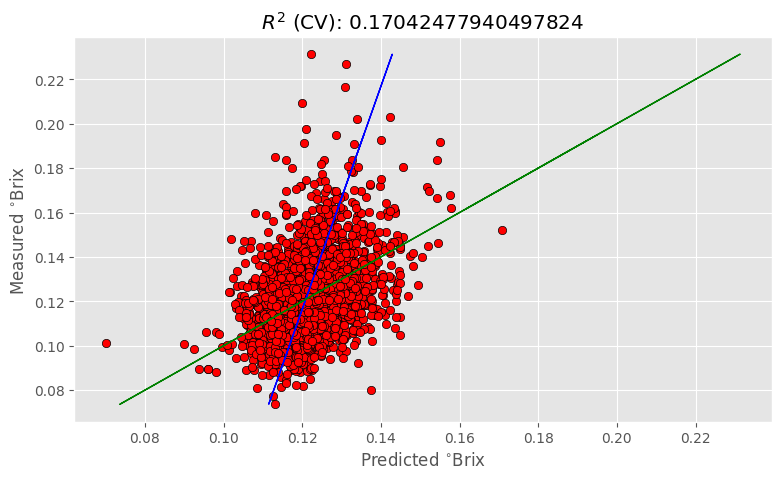

In [17]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x, y, 30)
simple_pls_cv(opt_Xc, y, ncomp)